In [33]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
get_ipython().run_line_magic('matplotlib', 'inline')

In [34]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.18.5
1.0.5
0.10.1


In [35]:
# Read the dataset
v1 = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [36]:
## Size of the dataset
v1.shape

(777, 18)

In [37]:
# Information about features
v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [38]:
v1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,University of Delaware,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777,NaN,NaN,NaN,3001.64,3870.2,81,776,1558,3624,48094
Accept,777,NaN,NaN,NaN,2018.8,2451.11,72,604,1110,2424,26330
Enroll,777,NaN,NaN,NaN,779.973,929.176,35,242,434,902,6392
Top10perc,777,NaN,NaN,NaN,27.5586,17.6404,1,15,23,35,96
Top25perc,777,NaN,NaN,NaN,55.7967,19.8048,9,41,54,69,100
F.Undergrad,777,NaN,NaN,NaN,3699.91,4850.42,139,992,1707,4005,31643
P.Undergrad,777,NaN,NaN,NaN,855.299,1522.43,1,95,353,967,21836
Outstate,777,NaN,NaN,NaN,10440.7,4023.02,2340,7320,9990,12925,21700
Room.Board,777,NaN,NaN,NaN,4357.53,1096.7,1780,3597,4200,5050,8124


In [39]:
# Are there any duplicates?
dupli = v1.duplicated()
print('Number of duplicate rows = %d' % (dupli.sum()))
v1[dupli]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [40]:
v1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [94]:
# Renaming the column names for better understanding
v1.columns = ['University', 'Appli_Received', 'Appli_Accepted', 'No_of_Students_enrolled', 'Percent_of_Stu_from_Top10Percent_HighSchool', 'Percent_of_Stu_from_Top25Percent_HighSchool', 
                  'No_of_FullTime_Ungrad_Stu', 'No_of_PartTime_Ungrad_Stu', 'No_of_Outstate_Stu', 'Cost_of_Room_Board', 'Book_Cost_1Stu', 'Approx_Exp_1Std',
                 'Percent_Faculty_PhD', 'Percent_Faculty_TerminalDegree', 'StudentperFacultyRatio', 'Percent_Alumni_Donate', 'Instruc_Exp_PerStu', 'Grad_Rate']

In [95]:
v1.head()

,University,Appli_Received,Appli_Accepted,No_of_Students_enrolled,Percent_of_Stu_from_Top10Percent_HighSchool,Percent_of_Stu_from_Top25Percent_HighSchool,No_of_FullTime_Ungrad_Stu,No_of_PartTime_Ungrad_Stu,No_of_Outstate_Stu,Cost_of_Room_Board,Book_Cost_1Stu,Approx_Exp_1Std,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree,StudentperFacultyRatio,Percent_Alumni_Donate,Instruc_Exp_PerStu,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [96]:
v1.describe().T

,count,mean,std,min,25%,50%,75%,max
Appli_Received,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Appli_Accepted,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
No_of_Students_enrolled,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Percent_of_Stu_from_Top10Percent_HighSchool,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Percent_of_Stu_from_Top25Percent_HighSchool,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
No_of_FullTime_Ungrad_Stu,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
No_of_PartTime_Ungrad_Stu,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
No_of_Outstate_Stu,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Cost_of_Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Book_Cost_1Stu,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [97]:
v1.isnull().sum()

University                                     0
Appli_Received                                 0
Appli_Accepted                                 0
No_of_Students_enrolled                        0
Percent_of_Stu_from_Top10Percent_HighSchool    0
Percent_of_Stu_from_Top25Percent_HighSchool    0
No_of_FullTime_Ungrad_Stu                      0
No_of_PartTime_Ungrad_Stu                      0
No_of_Outstate_Stu                             0
Cost_of_Room_Board                             0
Book_Cost_1Stu                                 0
Approx_Exp_1Std                                0
Percent_Faculty_PhD                            0
Percent_Faculty_TerminalDegree                 0
StudentperFacultyRatio                         0
Percent_Alumni_Donate                          0
Instruc_Exp_PerStu                             0
Grad_Rate                                      0
dtype: int64

In [98]:
v1.No_of_FullTime_Ungrad_Stu.describe()

count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: No_of_FullTime_Ungrad_Stu, dtype: float64

0     440
1     663
2    1006
dtype: int64

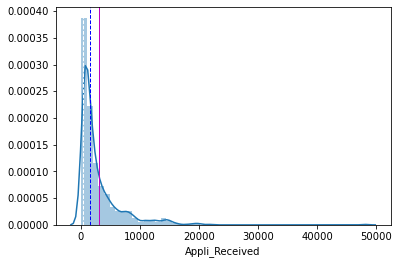

In [99]:
sns.distplot(v1.Appli_Received) 
plt.axvline(v1.Appli_Received.mean(), color='m', linewidth=1)
plt.axvline(v1.Appli_Received.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Appli_Received.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Appli_Received.mode()

0    452
dtype: int64

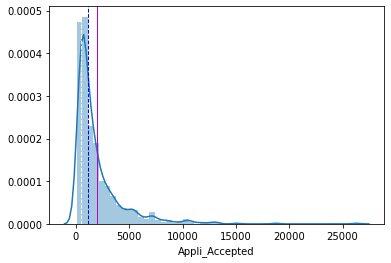

In [100]:
sns.distplot(v1.Appli_Accepted) 
plt.axvline(v1.Appli_Accepted.mean(), color='m', linewidth=1)
plt.axvline(v1.Appli_Accepted.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Appli_Accepted.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Appli_Accepted.mode()

0    177
1    295
dtype: int64

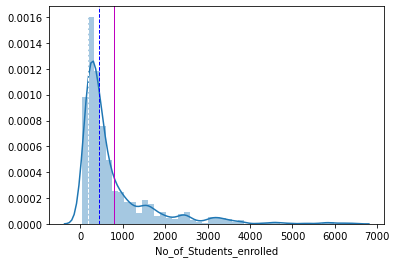

In [101]:
sns.distplot(v1.No_of_Students_enrolled) 
plt.axvline(v1.No_of_Students_enrolled.mean(), color='m', linewidth=1)
plt.axvline(v1.No_of_Students_enrolled.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.No_of_Students_enrolled.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.No_of_Students_enrolled.mode()

0    20
dtype: int64

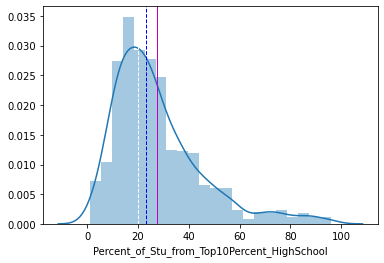

In [102]:
sns.distplot(v1.Percent_of_Stu_from_Top10Percent_HighSchool) 
plt.axvline(v1.Percent_of_Stu_from_Top10Percent_HighSchool.mean(), color='m', linewidth=1)
plt.axvline(v1.Percent_of_Stu_from_Top10Percent_HighSchool.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Percent_of_Stu_from_Top10Percent_HighSchool.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Percent_of_Stu_from_Top10Percent_HighSchool.mode()

0    55
1    60
dtype: int64

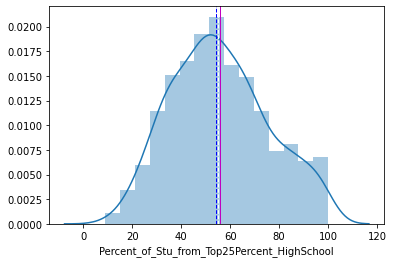

In [103]:
sns.distplot(v1.Percent_of_Stu_from_Top25Percent_HighSchool) 
plt.axvline(v1.Percent_of_Stu_from_Top25Percent_HighSchool.mean(), color='m', linewidth=1)
plt.axvline(v1.Percent_of_Stu_from_Top25Percent_HighSchool.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Percent_of_Stu_from_Top25Percent_HighSchool.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Percent_of_Stu_from_Top25Percent_HighSchool.mode()

0     500
1     662
2     959
3    1115
4    1306
5    1345
6    1707
dtype: int64

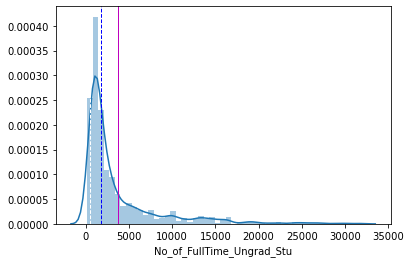

In [104]:
sns.distplot(v1.No_of_FullTime_Ungrad_Stu) 
plt.axvline(v1.No_of_FullTime_Ungrad_Stu.mean(), color='m', linewidth=1)
plt.axvline(v1.No_of_FullTime_Ungrad_Stu.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.No_of_FullTime_Ungrad_Stu.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.No_of_FullTime_Ungrad_Stu.mode()

0    30
dtype: int64

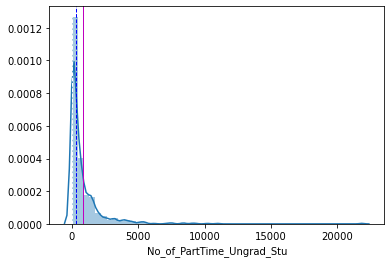

In [105]:
sns.distplot(v1.No_of_PartTime_Ungrad_Stu) 
plt.axvline(v1.No_of_PartTime_Ungrad_Stu.mean(), color='m', linewidth=1)
plt.axvline(v1.No_of_PartTime_Ungrad_Stu.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.No_of_PartTime_Ungrad_Stu.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.No_of_PartTime_Ungrad_Stu.mode()

0    6550
dtype: int64

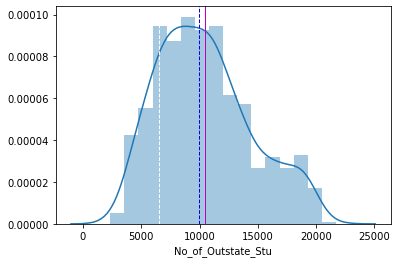

In [106]:
sns.distplot(v1.No_of_Outstate_Stu) 
plt.axvline(v1.No_of_Outstate_Stu.mean(), color='m', linewidth=1)
plt.axvline(v1.No_of_Outstate_Stu.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.No_of_Outstate_Stu.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.No_of_Outstate_Stu.mode()

0    4100
dtype: int64

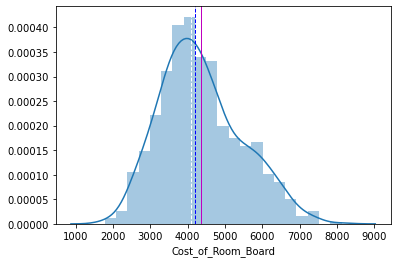

In [107]:
sns.distplot(v1.Cost_of_Room_Board) 
plt.axvline(v1.Cost_of_Room_Board.mean(), color='m', linewidth=1)
plt.axvline(v1.Cost_of_Room_Board.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Cost_of_Room_Board.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Cost_of_Room_Board.mode()

0    500
dtype: int64

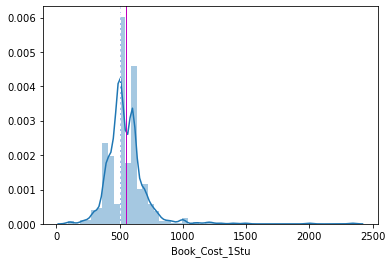

In [108]:
sns.distplot(v1.Book_Cost_1Stu) 
plt.axvline(v1.Book_Cost_1Stu.mean(), color='m', linewidth=1)
plt.axvline(v1.Book_Cost_1Stu.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Book_Cost_1Stu.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Book_Cost_1Stu.mode()

0    1000
dtype: int64

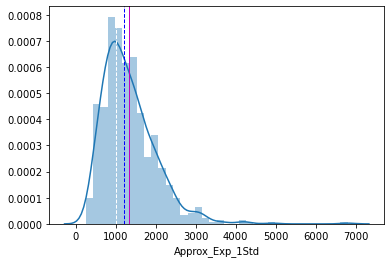

In [109]:
sns.distplot(v1.Approx_Exp_1Std) 
plt.axvline(v1.Approx_Exp_1Std.mean(), color='m', linewidth=1)
plt.axvline(v1.Approx_Exp_1Std.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Approx_Exp_1Std.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Approx_Exp_1Std.mode()

0    77
dtype: int64

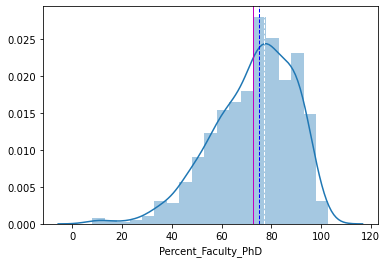

In [110]:
sns.distplot(v1.Percent_Faculty_PhD) 
plt.axvline(v1.Percent_Faculty_PhD.mean(), color='m', linewidth=1)
plt.axvline(v1.Percent_Faculty_PhD.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Percent_Faculty_PhD.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Percent_Faculty_PhD.mode()

0    96
dtype: int64

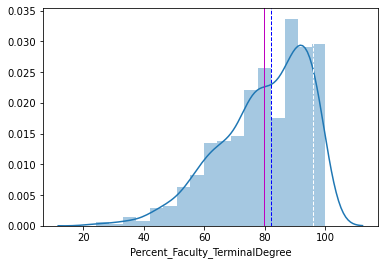

In [111]:
sns.distplot(v1.Percent_Faculty_TerminalDegree) 
plt.axvline(v1.Percent_Faculty_TerminalDegree.mean(), color='m', linewidth=1)
plt.axvline(v1.Percent_Faculty_TerminalDegree.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Percent_Faculty_TerminalDegree.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Percent_Faculty_TerminalDegree.mode()

0    12.1
dtype: float64

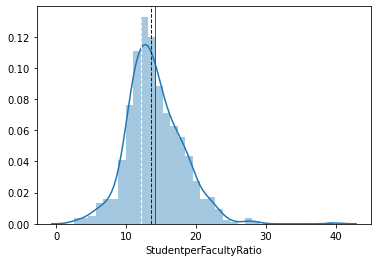

In [113]:
sns.distplot(v1.StudentperFacultyRatio) 
plt.axvline(v1.StudentperFacultyRatio.mean(), color='m', linewidth=1)
plt.axvline(v1.StudentperFacultyRatio.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.StudentperFacultyRatio.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.StudentperFacultyRatio.mode()

0    10
dtype: int64

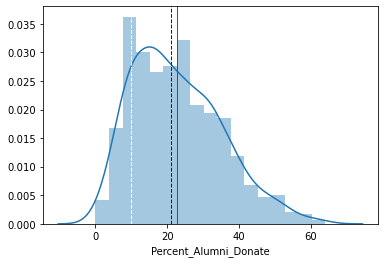

In [114]:
sns.distplot(v1.Percent_Alumni_Donate) 
plt.axvline(v1.Percent_Alumni_Donate.mean(), color='m', linewidth=1)
plt.axvline(v1.Percent_Alumni_Donate.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Percent_Alumni_Donate.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Percent_Alumni_Donate.mode()

0      4900
1      5935
2      6333
3      6413
4      6433
5      6562
6      6716
7      6719
8      6898
9      6971
10     7041
11     7114
12     7309
13     7348
14     7762
15     7881
16     7940
17     8118
18     8135
19     8189
20     8324
21     8355
22     8604
23     8686
24     8847
25     8954
26     9084
27     9158
28     9209
29     9431
30    10872
31    10912
32    10922
dtype: int64

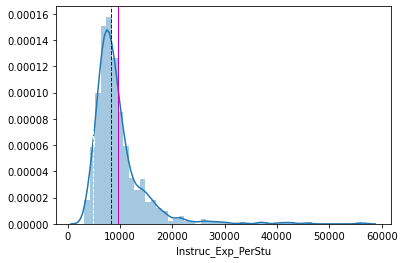

In [115]:
sns.distplot(v1.Instruc_Exp_PerStu) 
plt.axvline(v1.Instruc_Exp_PerStu.mean(), color='m', linewidth=1)
plt.axvline(v1.Instruc_Exp_PerStu.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Instruc_Exp_PerStu.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Instruc_Exp_PerStu.mode()

0    72
dtype: int64

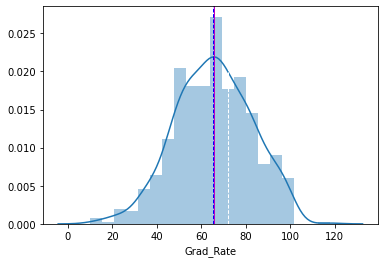

In [116]:
sns.distplot(v1.Grad_Rate) 
plt.axvline(v1.Grad_Rate.mean(), color='m', linewidth=1)
plt.axvline(v1.Grad_Rate.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(v1.Grad_Rate.mode()[0], color='w', linestyle='dashed', linewidth=1)
v1.Grad_Rate.mode()

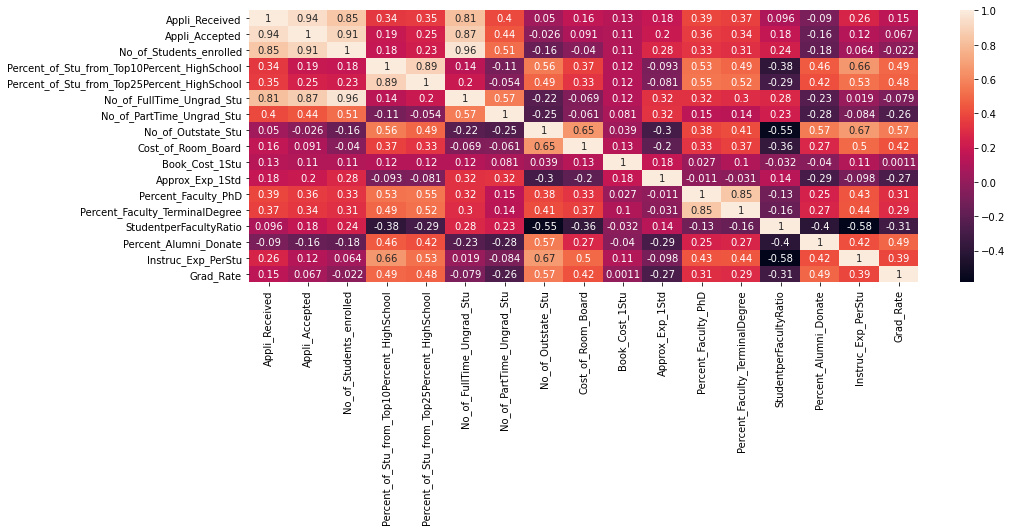

In [120]:
plt.figure(figsize =(15,5))
sns.heatmap(v1.corr(), annot=True)

In [121]:
v1.corr()

,Appli_Received,Appli_Accepted,No_of_Students_enrolled,Percent_of_Stu_from_Top10Percent_HighSchool,Percent_of_Stu_from_Top25Percent_HighSchool,No_of_FullTime_Ungrad_Stu,No_of_PartTime_Ungrad_Stu,No_of_Outstate_Stu,Cost_of_Room_Board,Book_Cost_1Stu,Approx_Exp_1Std,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree,StudentperFacultyRatio,Percent_Alumni_Donate,Instruc_Exp_PerStu,Grad_Rate
Appli_Received,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Appli_Accepted,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
No_of_Students_enrolled,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Percent_of_Stu_from_Top10Percent_HighSchool,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Percent_of_Stu_from_Top25Percent_HighSchool,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
No_of_FullTime_Ungrad_Stu,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
No_of_PartTime_Ungrad_Stu,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
No_of_Outstate_Stu,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Cost_of_Room_Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Book_Cost_1Stu,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [122]:
v1.cov()

,Appli_Received,Appli_Accepted,No_of_Students_enrolled,Percent_of_Stu_from_Top10Percent_HighSchool,Percent_of_Stu_from_Top25Percent_HighSchool,No_of_FullTime_Ungrad_Stu,No_of_PartTime_Ungrad_Stu,No_of_Outstate_Stu,Cost_of_Room_Board,Book_Cost_1Stu,Approx_Exp_1Std,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree,StudentperFacultyRatio,Percent_Alumni_Donate,Instruc_Exp_PerStu,Grad_Rate
Appli_Received,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Appli_Accepted,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
No_of_Students_enrolled,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Percent_of_Stu_from_Top10Percent_HighSchool,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Percent_of_Stu_from_Top25Percent_HighSchool,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
No_of_FullTime_Ungrad_Stu,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
No_of_PartTime_Ungrad_Stu,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
No_of_Outstate_Stu,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Cost_of_Room_Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Book_Cost_1Stu,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


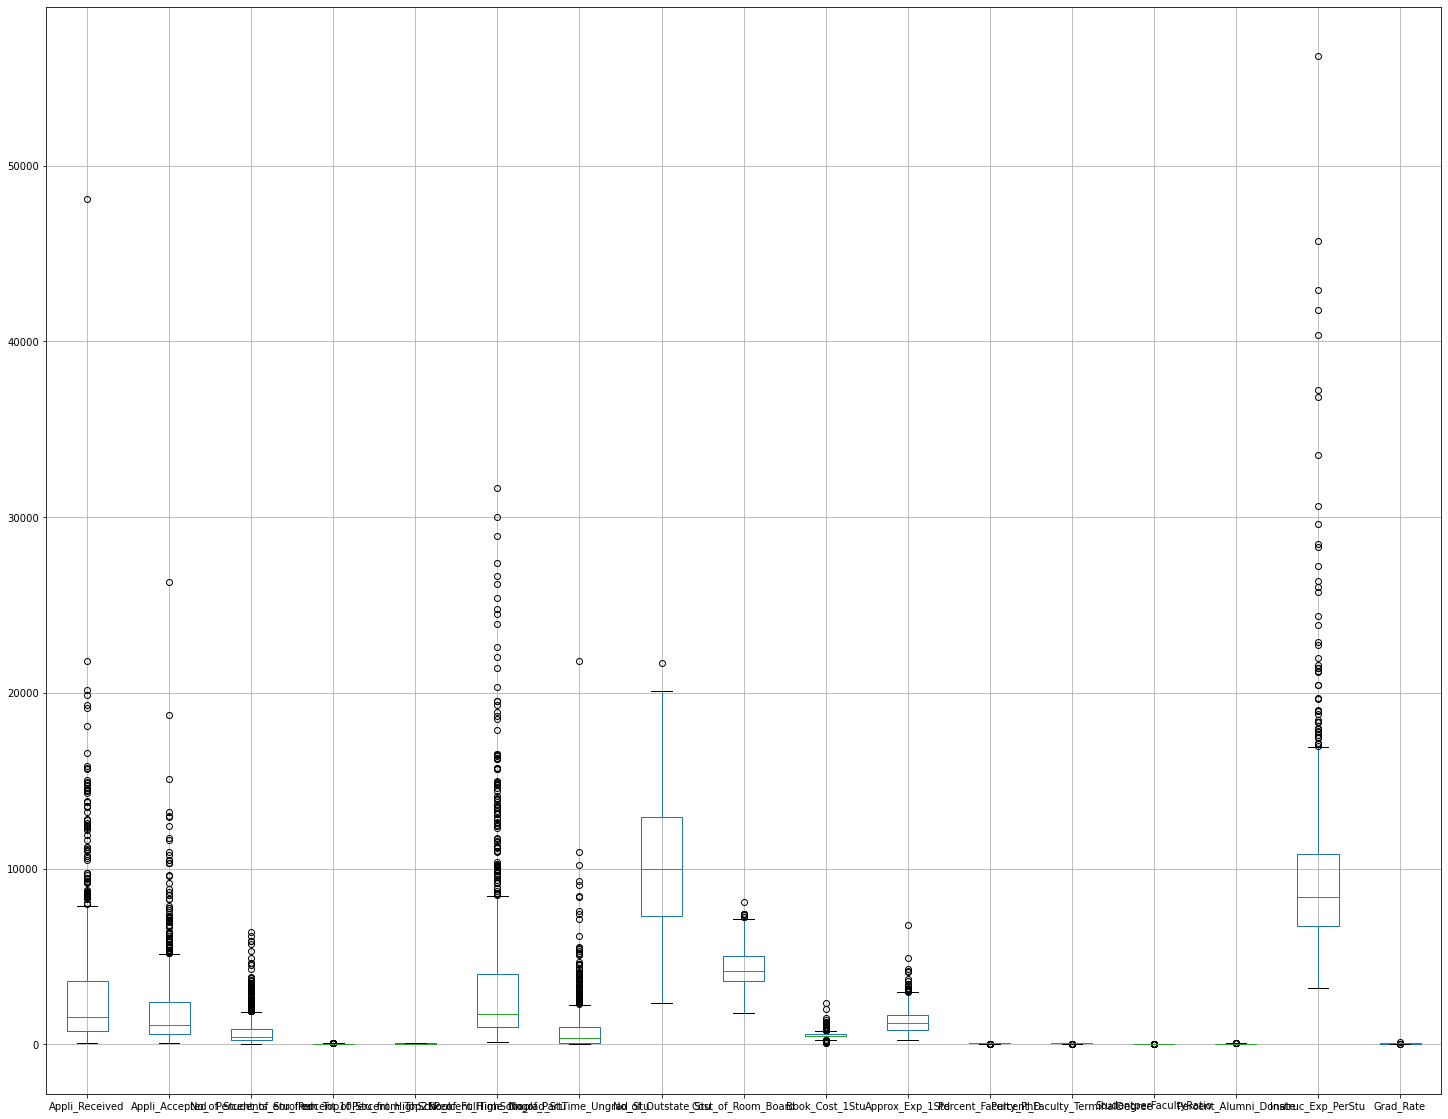

In [125]:
v1.boxplot(figsize=(25,20))

In [126]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

In [127]:
v1.columns

Index(['University', 'Appli_Received', 'Appli_Accepted',
       'No_of_Students_enrolled',
       'Percent_of_Stu_from_Top10Percent_HighSchool',
       'Percent_of_Stu_from_Top25Percent_HighSchool',
       'No_of_FullTime_Ungrad_Stu', 'No_of_PartTime_Ungrad_Stu',
       'No_of_Outstate_Stu', 'Cost_of_Room_Board', 'Book_Cost_1Stu',
       'Approx_Exp_1Std', 'Percent_Faculty_PhD',
       'Percent_Faculty_TerminalDegree', 'StudentperFacultyRatio',
       'Percent_Alumni_Donate', 'Instruc_Exp_PerStu', 'Grad_Rate'],
      dtype='object')

In [128]:
v1_scaled = pd.DataFrame()

In [131]:
v1_scaled['Appli_Received_MinMaxScale'] = minmax_scale.fit_transform(v1[['Appli_Received']])[:,0]

In [132]:
v1_scaled['Appli_Accepted_MinMaxScale'] = minmax_scale.fit_transform(v1[['Appli_Accepted']])[:,0]

In [133]:
v1_scaled['No_of_Students_enrolled_MinMaxScale'] = minmax_scale.fit_transform(v1[['No_of_Students_enrolled']])[:,0]

In [136]:
v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale'] = minmax_scale.fit_transform(v1[['Percent_of_Stu_from_Top10Percent_HighSchool']])[:,0]

In [137]:
v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale'] = minmax_scale.fit_transform(v1[['Percent_of_Stu_from_Top25Percent_HighSchool']])[:,0]

In [138]:
v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale'] = minmax_scale.fit_transform(v1[['No_of_FullTime_Ungrad_Stu']])[:,0]

In [139]:
v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale'] = minmax_scale.fit_transform(v1[['No_of_PartTime_Ungrad_Stu']])[:,0]

In [140]:
v1_scaled['No_of_Outstate_Stu_MinMaxScale'] = minmax_scale.fit_transform(v1[['No_of_Outstate_Stu']])[:,0]

In [142]:
v1_scaled['Cost_of_Room_Board_MinMaxScale'] = minmax_scale.fit_transform(v1[['Cost_of_Room_Board']])[:,0]

In [143]:
v1_scaled['Book_Cost_1Stu_MinMaxScale'] = minmax_scale.fit_transform(v1[['Book_Cost_1Stu']])[:,0]

In [144]:
v1_scaled['Approx_Exp_1Std_MinMaxScale'] = minmax_scale.fit_transform(v1[['Approx_Exp_1Std']])[:,0]

In [178]:
v1_scaled['Percent_Faculty_PhD_MinMaxScale'] = minmax_scale.fit_transform(v1[['Percent_Faculty_PhD']])[:,0]

In [146]:
v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale'] = minmax_scale.fit_transform(v1[['Percent_Faculty_TerminalDegree']])[:,0]

In [147]:
v1_scaled['StudentperFacultyRatio_MinMaxScale'] = minmax_scale.fit_transform(v1[['StudentperFacultyRatio']])[:,0]

In [148]:
v1_scaled['Percent_Alumni_Donate_MinMaxScale'] = minmax_scale.fit_transform(v1[['Percent_Alumni_Donate']])[:,0]

In [149]:
v1_scaled['Instruc_Exp_PerStu_MinMaxScale'] = minmax_scale.fit_transform(v1[['Instruc_Exp_PerStu']])[:,0]

In [150]:
v1_scaled['Grad_Rate_MinMaxScale'] = minmax_scale.fit_transform(v1[['Grad_Rate']])[:,0]

In [151]:
v1_scaled.head(10).T

,0,1,2,3,4,5,6,7,8,9
Appli_Received_MinMaxScale,0.032887,0.043842,0.028055,0.006998,0.002333,0.010539,0.005665,0.037865,0.019932,0.010435
Appli_Accepted_MinMaxScale,0.044177,0.070531,0.039036,0.010549,0.002818,0.015500,0.010206,0.062762,0.029210,0.016224
No_of_Students_enrolled_MinMaxScale,0.107913,0.075035,0.047349,0.016045,0.003146,0.019349,0.010697,0.071417,0.030203,0.021551
Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,0.231579,0.157895,0.221053,0.621053,0.157895,0.389474,0.168421,0.378947,0.305263,0.210526
Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,0.472527,0.219780,0.450549,0.879121,0.384615,0.582418,0.395604,0.648352,0.593407,0.384615
No_of_FullTime_Ungrad_Stu_MinMaxScale,0.087164,0.080752,0.028473,0.011776,0.003492,0.017109,0.008793,0.046185,0.026473,0.020950
No_of_PartTime_Ungrad_Stu_MinMaxScale,0.024548,0.056148,0.004488,0.002839,0.039753,0.001832,0.010488,0.001420,0.013968,0.003526
No_of_Outstate_Stu_MinMaxScale,0.263430,0.513430,0.460227,0.548554,0.269628,0.576446,0.565599,0.595455,0.684659,0.419835
Cost_of_Room_Board_MinMaxScale,0.239596,0.736129,0.310530,0.578499,0.368852,0.245113,0.621059,0.480139,0.412989,0.252207
Book_Cost_1Stu_MinMaxScale,0.157754,0.291444,0.135472,0.157754,0.313725,0.180036,0.180036,0.157754,0.090909,0.251337


In [152]:
v1_scaled.cov()

,Appli_Received_MinMaxScale,Appli_Accepted_MinMaxScale,No_of_Students_enrolled_MinMaxScale,Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,No_of_FullTime_Ungrad_Stu_MinMaxScale,No_of_PartTime_Ungrad_Stu_MinMaxScale,No_of_Outstate_Stu_MinMaxScale,Cost_of_Room_Board_MinMaxScale,Book_Cost_1Stu_MinMaxScale,Approx_Exp_1Std_MinMaxScale,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree_MinMaxScale,StudentperFacultyRatio_MinMaxScale,Percent_Alumni_Donate_MinMaxScale,Instruc_Exp_PerStu_MinMaxScale,Grad_Rate_MinMaxScale
Appli_Received_MinMaxScale,0.006498,0.007099,0.009977,0.005072,0.006169,0.010108,0.002238,0.000840,0.002298,0.000786,0.001489,0.005413,0.005770,0.000818,-0.001408,0.002060,0.001882
Appli_Accepted_MinMaxScale,0.007099,0.008714,0.012439,0.003336,0.005028,0.012564,0.002872,-0.000500,0.001467,0.000780,0.001939,0.005708,0.006104,0.001746,-0.002892,0.001146,0.000999
No_of_Students_enrolled_MinMaxScale,0.009977,0.012439,0.021364,0.004921,0.007213,0.021708,0.005229,-0.004722,-0.001017,0.001212,0.004245,0.008327,0.008729,0.003680,-0.005117,0.000923,-0.000519
Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,0.005072,0.003336,0.004921,0.034480,0.036047,0.004039,-0.001364,0.021698,0.011925,0.001624,-0.001791,0.016973,0.017666,-0.007584,0.016376,0.012081,0.014619
Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,0.006169,0.005028,0.007213,0.036047,0.047365,0.006683,-0.000813,0.022133,0.012472,0.001850,-0.001818,0.020419,0.022123,-0.006805,0.017608,0.011300,0.016521
No_of_FullTime_Ungrad_Stu_MinMaxScale,0.010108,0.012564,0.021708,0.004039,0.006683,0.023704,0.006124,-0.006902,-0.001834,0.001309,0.005048,0.008424,0.008948,0.004570,-0.006840,0.000283,-0.001929
No_of_PartTime_Ungrad_Stu_MinMaxScale,0.002238,0.002872,0.005229,-0.001364,-0.000813,0.006124,0.004861,-0.003673,-0.000739,0.000417,0.002306,0.001787,0.001917,0.001721,-0.003791,-0.000574,-0.002850
No_of_Outstate_Stu_MinMaxScale,0.000840,-0.000500,-0.004722,0.021698,0.022133,-0.006902,-0.003673,0.043181,0.023503,0.000594,-0.006424,0.013679,0.016423,-0.012235,0.022783,0.013762,0.018882
Cost_of_Room_Board_MinMaxScale,0.002298,0.001467,-0.001017,0.011925,0.012472,-0.001834,-0.000739,0.023503,0.029885,0.001628,-0.003564,0.009781,0.012543,-0.006653,0.009116,0.008538,0.011684
Book_Cost_1Stu_MinMaxScale,0.000786,0.000780,0.001212,0.001624,0.001850,0.001309,0.000417,0.000594,0.001628,0.005413,0.001364,0.000340,0.001425,-0.000249,-0.000573,0.000814,0.000012


In [153]:
v1_scaled.corr()

,Appli_Received_MinMaxScale,Appli_Accepted_MinMaxScale,No_of_Students_enrolled_MinMaxScale,Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,No_of_FullTime_Ungrad_Stu_MinMaxScale,No_of_PartTime_Ungrad_Stu_MinMaxScale,No_of_Outstate_Stu_MinMaxScale,Cost_of_Room_Board_MinMaxScale,Book_Cost_1Stu_MinMaxScale,Approx_Exp_1Std_MinMaxScale,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree_MinMaxScale,StudentperFacultyRatio_MinMaxScale,Percent_Alumni_Donate_MinMaxScale,Instruc_Exp_PerStu_MinMaxScale,Grad_Rate_MinMaxScale
Appli_Received_MinMaxScale,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Appli_Accepted_MinMaxScale,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
No_of_Students_enrolled_MinMaxScale,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
No_of_FullTime_Ungrad_Stu_MinMaxScale,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
No_of_PartTime_Ungrad_Stu_MinMaxScale,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
No_of_Outstate_Stu_MinMaxScale,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Cost_of_Room_Board_MinMaxScale,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Book_Cost_1Stu_MinMaxScale,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


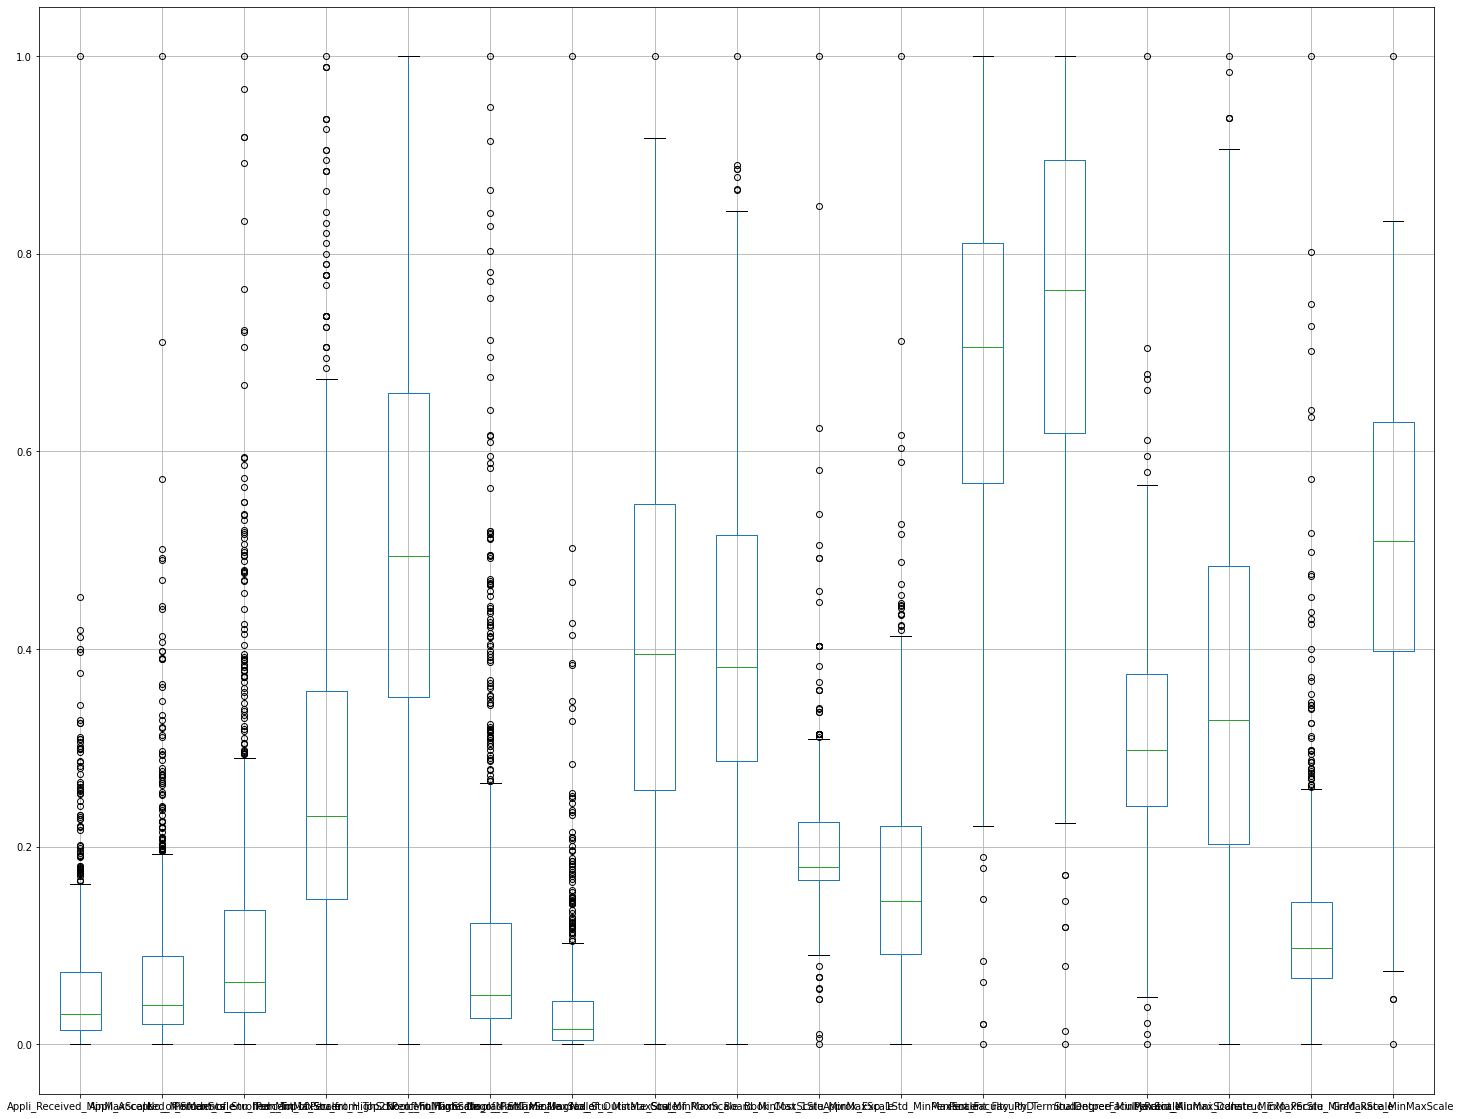

In [154]:
v1_scaled.boxplot(figsize=(25,20))

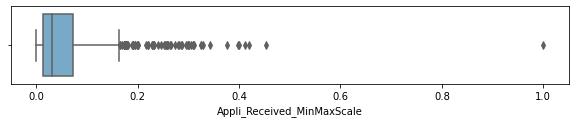

In [156]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Appli_Received_MinMaxScale'],palette = 'Blues')

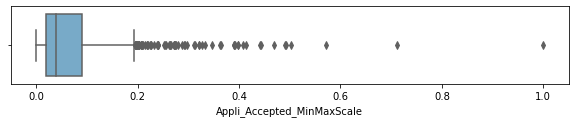

In [157]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Appli_Accepted_MinMaxScale'],palette = 'Blues')

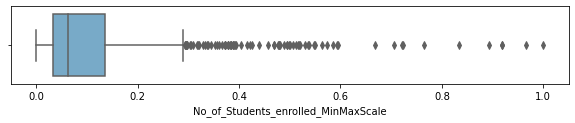

In [159]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_Students_enrolled_MinMaxScale'],palette = 'Blues')

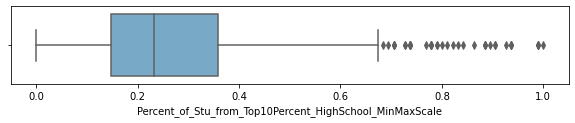

In [161]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale'],palette = 'Blues')

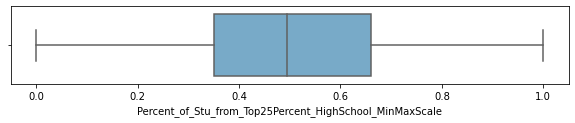

In [162]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale'],palette = 'Blues')

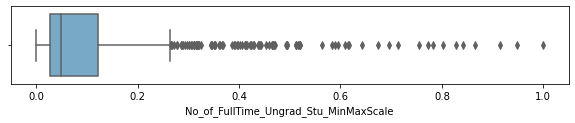

In [163]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale'],palette = 'Blues')

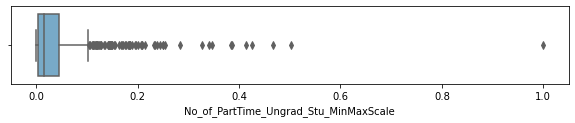

In [164]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale'],palette = 'Blues')

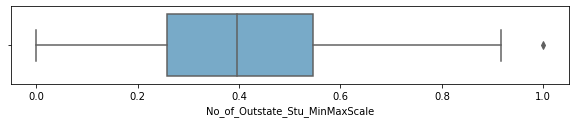

In [165]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_Outstate_Stu_MinMaxScale'],palette = 'Blues')

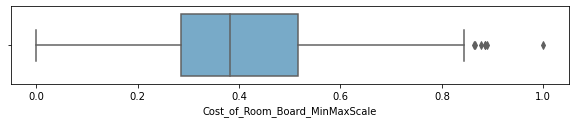

In [166]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Cost_of_Room_Board_MinMaxScale'],palette = 'Blues')

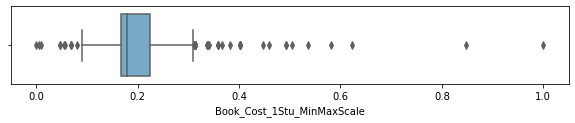

In [167]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Book_Cost_1Stu_MinMaxScale'],palette = 'Blues')

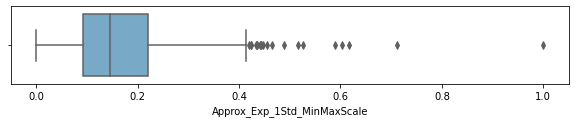

In [168]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Approx_Exp_1Std_MinMaxScale'],palette = 'Blues')

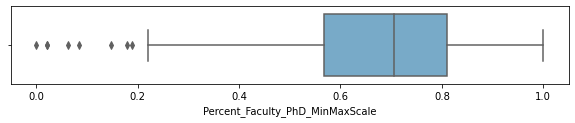

In [179]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_Faculty_PhD_MinMaxScale'],palette = 'Blues')

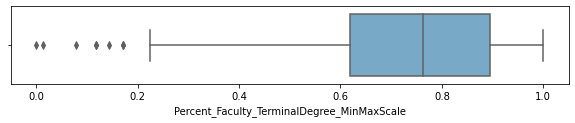

In [171]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale'],palette = 'Blues')

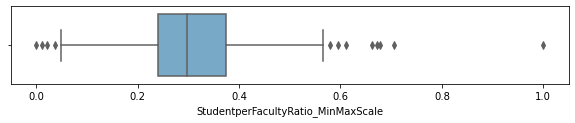

In [172]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['StudentperFacultyRatio_MinMaxScale'],palette = 'Blues')

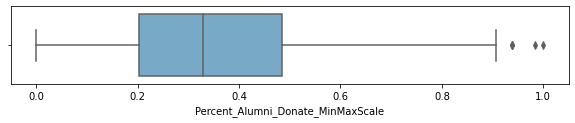

In [173]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_Alumni_Donate_MinMaxScale'],palette = 'Blues')

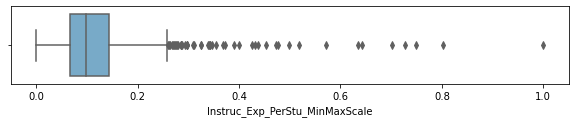

In [174]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Instruc_Exp_PerStu_MinMaxScale'],palette = 'Blues')

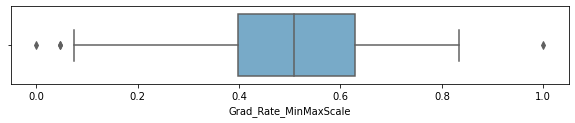

In [175]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Grad_Rate_MinMaxScale'],palette = 'Blues')

In [180]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [182]:
lrincome,urincome=remove_outlier(v1_scaled['Appli_Received_MinMaxScale'])
v1_scaled['Appli_Received_MinMaxScale']=np.where(v1_scaled['Appli_Received_MinMaxScale']>urincome,urincome,v1_scaled['Appli_Received_MinMaxScale'])
v1_scaled['Appli_Received_MinMaxScale']=np.where(v1_scaled['Appli_Received_MinMaxScale']<lrincome,lrincome,v1_scaled['Appli_Received_MinMaxScale'])

In [183]:
lrincome,urincome=remove_outlier(v1_scaled['Appli_Accepted_MinMaxScale'])
v1_scaled['Appli_Accepted_MinMaxScale']=np.where(v1_scaled['Appli_Accepted_MinMaxScale']>urincome,urincome,v1_scaled['Appli_Accepted_MinMaxScale'])
v1_scaled['Appli_Accepted_MinMaxScale']=np.where(v1_scaled['Appli_Accepted_MinMaxScale']<lrincome,lrincome,v1_scaled['Appli_Accepted_MinMaxScale'])

In [184]:
lrincome,urincome=remove_outlier(v1_scaled['No_of_Students_enrolled_MinMaxScale'])
v1_scaled['No_of_Students_enrolled_MinMaxScale']=np.where(v1_scaled['No_of_Students_enrolled_MinMaxScale']>urincome,urincome,v1_scaled['No_of_Students_enrolled_MinMaxScale'])
v1_scaled['No_of_Students_enrolled_MinMaxScale']=np.where(v1_scaled['No_of_Students_enrolled_MinMaxScale']<lrincome,lrincome,v1_scaled['No_of_Students_enrolled_MinMaxScale'])

In [185]:
lrincome,urincome=remove_outlier(v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale'])
v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale']=np.where(v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale']>urincome,urincome,v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale'])
v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale']=np.where(v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale']<lrincome,lrincome,v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale'])

In [186]:
lrincome,urincome=remove_outlier(v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale'])
v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale']=np.where(v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale']>urincome,urincome,v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale'])
v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale']=np.where(v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale']<lrincome,lrincome,v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale'])

In [187]:
lrincome,urincome=remove_outlier(v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale'])
v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale']=np.where(v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale']>urincome,urincome,v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale'])
v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale']=np.where(v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale']<lrincome,lrincome,v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale'])

In [199]:
lrincome,urincome=remove_outlier(v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale'])
v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale']=np.where(v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale']>urincome,urincome,v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale'])
v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale']=np.where(v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale']<lrincome,lrincome,v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale'])

In [189]:
lrincome,urincome=remove_outlier(v1_scaled['No_of_Outstate_Stu_MinMaxScale'])
v1_scaled['No_of_Outstate_Stu_MinMaxScale']=np.where(v1_scaled['No_of_Outstate_Stu_MinMaxScale']>urincome,urincome,v1_scaled['No_of_Outstate_Stu_MinMaxScale'])
v1_scaled['No_of_Outstate_Stu_MinMaxScale']=np.where(v1_scaled['No_of_Outstate_Stu_MinMaxScale']<lrincome,lrincome,v1_scaled['No_of_Outstate_Stu_MinMaxScale'])

In [190]:
lrincome,urincome=remove_outlier(v1_scaled['Cost_of_Room_Board_MinMaxScale'])
v1_scaled['Cost_of_Room_Board_MinMaxScale']=np.where(v1_scaled['Cost_of_Room_Board_MinMaxScale']>urincome,urincome,v1_scaled['Cost_of_Room_Board_MinMaxScale'])
v1_scaled['Cost_of_Room_Board_MinMaxScale']=np.where(v1_scaled['Cost_of_Room_Board_MinMaxScale']<lrincome,lrincome,v1_scaled['Cost_of_Room_Board_MinMaxScale'])

In [191]:
lrincome,urincome=remove_outlier(v1_scaled['Book_Cost_1Stu_MinMaxScale'])
v1_scaled['Book_Cost_1Stu_MinMaxScale']=np.where(v1_scaled['Book_Cost_1Stu_MinMaxScale']>urincome,urincome,v1_scaled['Book_Cost_1Stu_MinMaxScale'])
v1_scaled['Book_Cost_1Stu_MinMaxScale']=np.where(v1_scaled['Book_Cost_1Stu_MinMaxScale']<lrincome,lrincome,v1_scaled['Book_Cost_1Stu_MinMaxScale'])

In [192]:
lrincome,urincome=remove_outlier(v1_scaled['Approx_Exp_1Std_MinMaxScale'])
v1_scaled['Approx_Exp_1Std_MinMaxScale']=np.where(v1_scaled['Approx_Exp_1Std_MinMaxScale']>urincome,urincome,v1_scaled['Approx_Exp_1Std_MinMaxScale'])
v1_scaled['Approx_Exp_1Std_MinMaxScale']=np.where(v1_scaled['Approx_Exp_1Std_MinMaxScale']<lrincome,lrincome,v1_scaled['Approx_Exp_1Std_MinMaxScale'])

In [193]:
lrincome,urincome=remove_outlier(v1_scaled['Percent_Faculty_PhD_MinMaxScale'])
v1_scaled['Percent_Faculty_PhD_MinMaxScale']=np.where(v1_scaled['Percent_Faculty_PhD_MinMaxScale']>urincome,urincome,v1_scaled['Percent_Faculty_PhD_MinMaxScale'])
v1_scaled['Percent_Faculty_PhD_MinMaxScale']=np.where(v1_scaled['Percent_Faculty_PhD_MinMaxScale']<lrincome,lrincome,v1_scaled['Percent_Faculty_PhD_MinMaxScale'])

In [194]:
lrincome,urincome=remove_outlier(v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale'])
v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale']=np.where(v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale']>urincome,urincome,v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale'])
v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale']=np.where(v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale']<lrincome,lrincome,v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale'])

In [195]:
lrincome,urincome=remove_outlier(v1_scaled['StudentperFacultyRatio_MinMaxScale'])
v1_scaled['StudentperFacultyRatio_MinMaxScale']=np.where(v1_scaled['StudentperFacultyRatio_MinMaxScale']>urincome,urincome,v1_scaled['StudentperFacultyRatio_MinMaxScale'])
v1_scaled['StudentperFacultyRatio_MinMaxScale']=np.where(v1_scaled['StudentperFacultyRatio_MinMaxScale']<lrincome,lrincome,v1_scaled['StudentperFacultyRatio_MinMaxScale'])

In [196]:
lrincome,urincome=remove_outlier(v1_scaled['Percent_Alumni_Donate_MinMaxScale'])
v1_scaled['Percent_Alumni_Donate_MinMaxScale']=np.where(v1_scaled['Percent_Alumni_Donate_MinMaxScale']>urincome,urincome,v1_scaled['Percent_Alumni_Donate_MinMaxScale'])
v1_scaled['Percent_Alumni_Donate_MinMaxScale']=np.where(v1_scaled['Percent_Alumni_Donate_MinMaxScale']<lrincome,lrincome,v1_scaled['Percent_Alumni_Donate_MinMaxScale'])

In [197]:
lrincome,urincome=remove_outlier(v1_scaled['Instruc_Exp_PerStu_MinMaxScale'])
v1_scaled['Instruc_Exp_PerStu_MinMaxScale']=np.where(v1_scaled['Instruc_Exp_PerStu_MinMaxScale']>urincome,urincome,v1_scaled['Instruc_Exp_PerStu_MinMaxScale'])
v1_scaled['Instruc_Exp_PerStu_MinMaxScale']=np.where(v1_scaled['Instruc_Exp_PerStu_MinMaxScale']<lrincome,lrincome,v1_scaled['Instruc_Exp_PerStu_MinMaxScale'])

In [198]:
lrincome,urincome=remove_outlier(v1_scaled['Grad_Rate_MinMaxScale'])
v1_scaled['Grad_Rate_MinMaxScale']=np.where(v1_scaled['Grad_Rate_MinMaxScale']>urincome,urincome,v1_scaled['Grad_Rate_MinMaxScale'])
v1_scaled['Grad_Rate_MinMaxScale']=np.where(v1_scaled['Grad_Rate_MinMaxScale']<lrincome,lrincome,v1_scaled['Grad_Rate_MinMaxScale'])

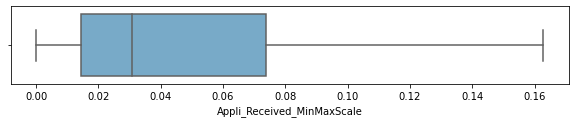

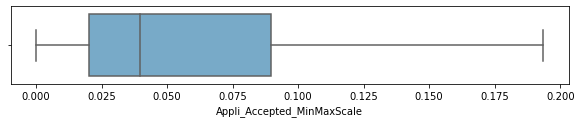

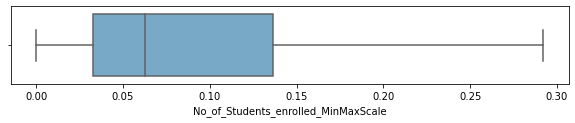

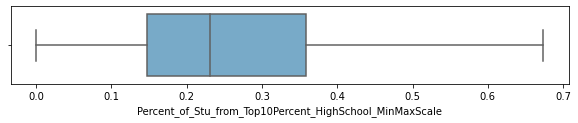

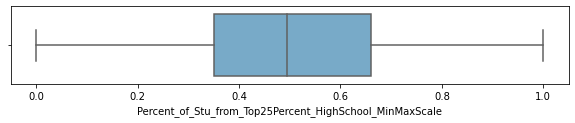

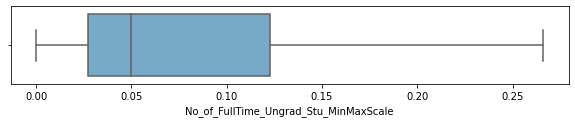

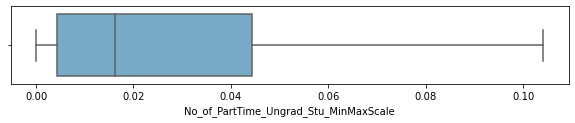

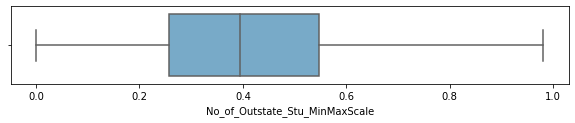

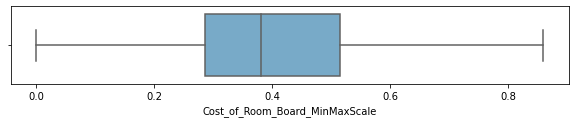

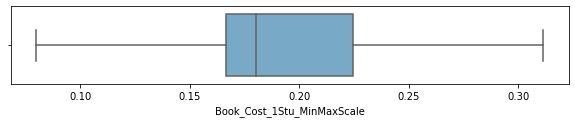

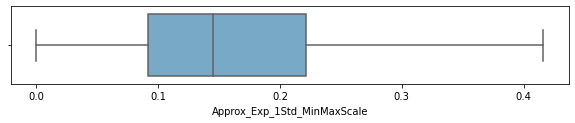

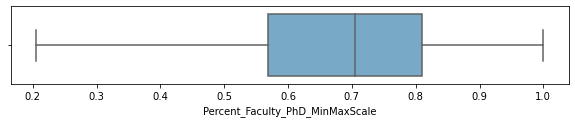

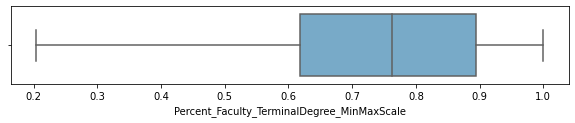

In [200]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Appli_Received_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Appli_Accepted_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_Students_enrolled_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_FullTime_Ungrad_Stu_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_PartTime_Ungrad_Stu_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['No_of_Outstate_Stu_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Cost_of_Room_Board_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Book_Cost_1Stu_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Approx_Exp_1Std_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_Faculty_PhD_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=v1_scaled['Percent_Faculty_TerminalDegree_MinMaxScale'],palette = 'Blues')


In [201]:
v1_scaled.cov()

,Appli_Received_MinMaxScale,Appli_Accepted_MinMaxScale,No_of_Students_enrolled_MinMaxScale,Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,No_of_FullTime_Ungrad_Stu_MinMaxScale,No_of_PartTime_Ungrad_Stu_MinMaxScale,No_of_Outstate_Stu_MinMaxScale,Cost_of_Room_Board_MinMaxScale,Book_Cost_1Stu_MinMaxScale,Approx_Exp_1Std_MinMaxScale,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree_MinMaxScale,StudentperFacultyRatio_MinMaxScale,Percent_Alumni_Donate_MinMaxScale,Instruc_Exp_PerStu_MinMaxScale,Grad_Rate_MinMaxScale,Percent_Faculty_PhD_MinMaxScale
Appli_Received_MinMaxScale,0.002545,0.002796,0.004058,0.002659,0.004002,0.003723,0.000860,0.000685,0.001626,0.000612,0.001079,0.003970,0.004174,0.000647,-0.000983,0.000785,0.001208,0.003930
Appli_Accepted_MinMaxScale,0.002796,0.003365,0.004866,0.002125,0.003455,0.004460,0.001090,-0.000060,0.001193,0.000622,0.001384,0.004207,0.004457,0.001109,-0.001849,0.000601,0.000727,0.004163
No_of_Students_enrolled_MinMaxScale,0.004058,0.004866,0.008043,0.002527,0.004498,0.007436,0.001888,-0.002900,-0.000368,0.000931,0.002832,0.005818,0.006052,0.002496,-0.003847,0.000311,-0.000331,0.005746
Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,0.002659,0.002125,0.002527,0.026905,0.032623,0.001564,-0.000969,0.019155,0.010078,0.001292,-0.001782,0.015222,0.015829,-0.006456,0.014398,0.006900,0.012853,0.014986
Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,0.004002,0.003455,0.004498,0.032623,0.047365,0.003380,-0.000709,0.022133,0.012384,0.001897,-0.001758,0.020419,0.021869,-0.006563,0.017471,0.007983,0.016546,0.020154
No_of_FullTime_Ungrad_Stu_MinMaxScale,0.003723,0.004460,0.007436,0.001564,0.003380,0.007346,0.001957,-0.004027,-0.000803,0.000915,0.002870,0.005267,0.005469,0.002822,-0.004712,0.000002,-0.001119,0.005204
No_of_PartTime_Ungrad_Stu_MinMaxScale,0.000860,0.001090,0.001888,-0.000969,-0.000709,0.001957,0.001076,-0.002414,-0.000381,0.000206,0.001050,0.000722,0.000763,0.001233,-0.002649,-0.000424,-0.001381,0.000703
No_of_Outstate_Stu_MinMaxScale,0.000685,-0.000060,-0.002900,0.019155,0.022133,-0.004027,-0.002414,0.043153,0.023410,0.000055,-0.006294,0.013688,0.016321,-0.012090,0.022633,0.010312,0.018876,0.013651
Cost_of_Room_Board_MinMaxScale,0.001626,0.001193,-0.000368,0.010078,0.012384,-0.000803,-0.000381,0.023410,0.029557,0.000962,-0.003512,0.009755,0.012417,-0.006566,0.009019,0.006391,0.011619,0.009858
Book_Cost_1Stu_MinMaxScale,0.000612,0.000622,0.000931,0.001292,0.001897,0.000915,0.000206,0.000055,0.000962,0.002637,0.001146,0.001105,0.001558,-0.000044,-0.000424,0.000493,-0.000066,0.001176


In [202]:
v1_scaled.corr()

,Appli_Received_MinMaxScale,Appli_Accepted_MinMaxScale,No_of_Students_enrolled_MinMaxScale,Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,No_of_FullTime_Ungrad_Stu_MinMaxScale,No_of_PartTime_Ungrad_Stu_MinMaxScale,No_of_Outstate_Stu_MinMaxScale,Cost_of_Room_Board_MinMaxScale,Book_Cost_1Stu_MinMaxScale,Approx_Exp_1Std_MinMaxScale,Percent_Faculty_PhD,Percent_Faculty_TerminalDegree_MinMaxScale,StudentperFacultyRatio_MinMaxScale,Percent_Alumni_Donate_MinMaxScale,Instruc_Exp_PerStu_MinMaxScale,Grad_Rate_MinMaxScale,Percent_Faculty_PhD_MinMaxScale
Appli_Received_MinMaxScale,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.457815,0.434478,0.126411,-0.101158,0.242935,0.150803,0.463924
Appli_Accepted_MinMaxScale,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.421975,0.403409,0.188506,-0.165516,0.161808,0.078982,0.427341
No_of_Students_enrolled_MinMaxScale,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.377460,0.354379,0.274269,-0.222723,0.054221,-0.023251,0.381540
Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.539932,0.506748,-0.387926,0.455797,0.657039,0.493670,0.544048
Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.545862,0.527654,-0.297233,0.416832,0.572905,0.478985,0.551461
No_of_FullTime_Ungrad_Stu_MinMaxScale,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.357549,0.335054,0.324504,-0.285457,0.000371,-0.082239,0.361564
No_of_PartTime_Ungrad_Stu_MinMaxScale,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127995,0.122152,0.370607,-0.419334,-0.201929,-0.265158,0.127663
No_of_Outstate_Stu_MinMaxScale,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.383378,0.412579,-0.573683,0.565736,0.775328,0.572458,0.391321
Cost_of_Room_Board_MinMaxScale,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.330132,0.379270,-0.376430,0.272393,0.580622,0.425790,0.341469
Book_Cost_1Stu_MinMaxScale,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.125204,0.159318,-0.008536,-0.042832,0.149983,-0.008051,0.136390


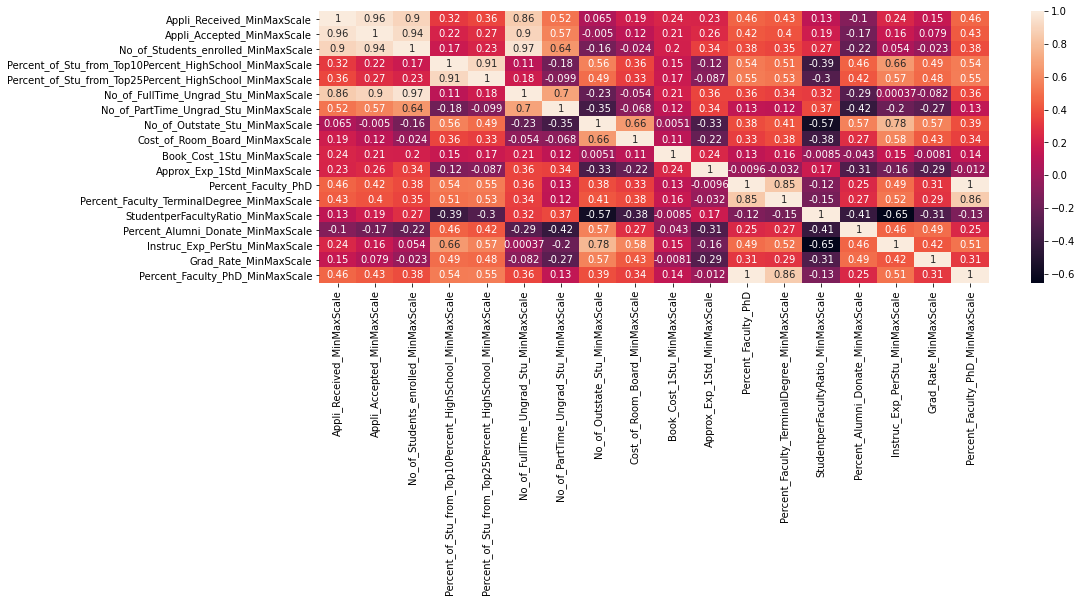

In [203]:
plt.figure(figsize =(15,5))
sns.heatmap(v1_scaled.corr(), annot=True)

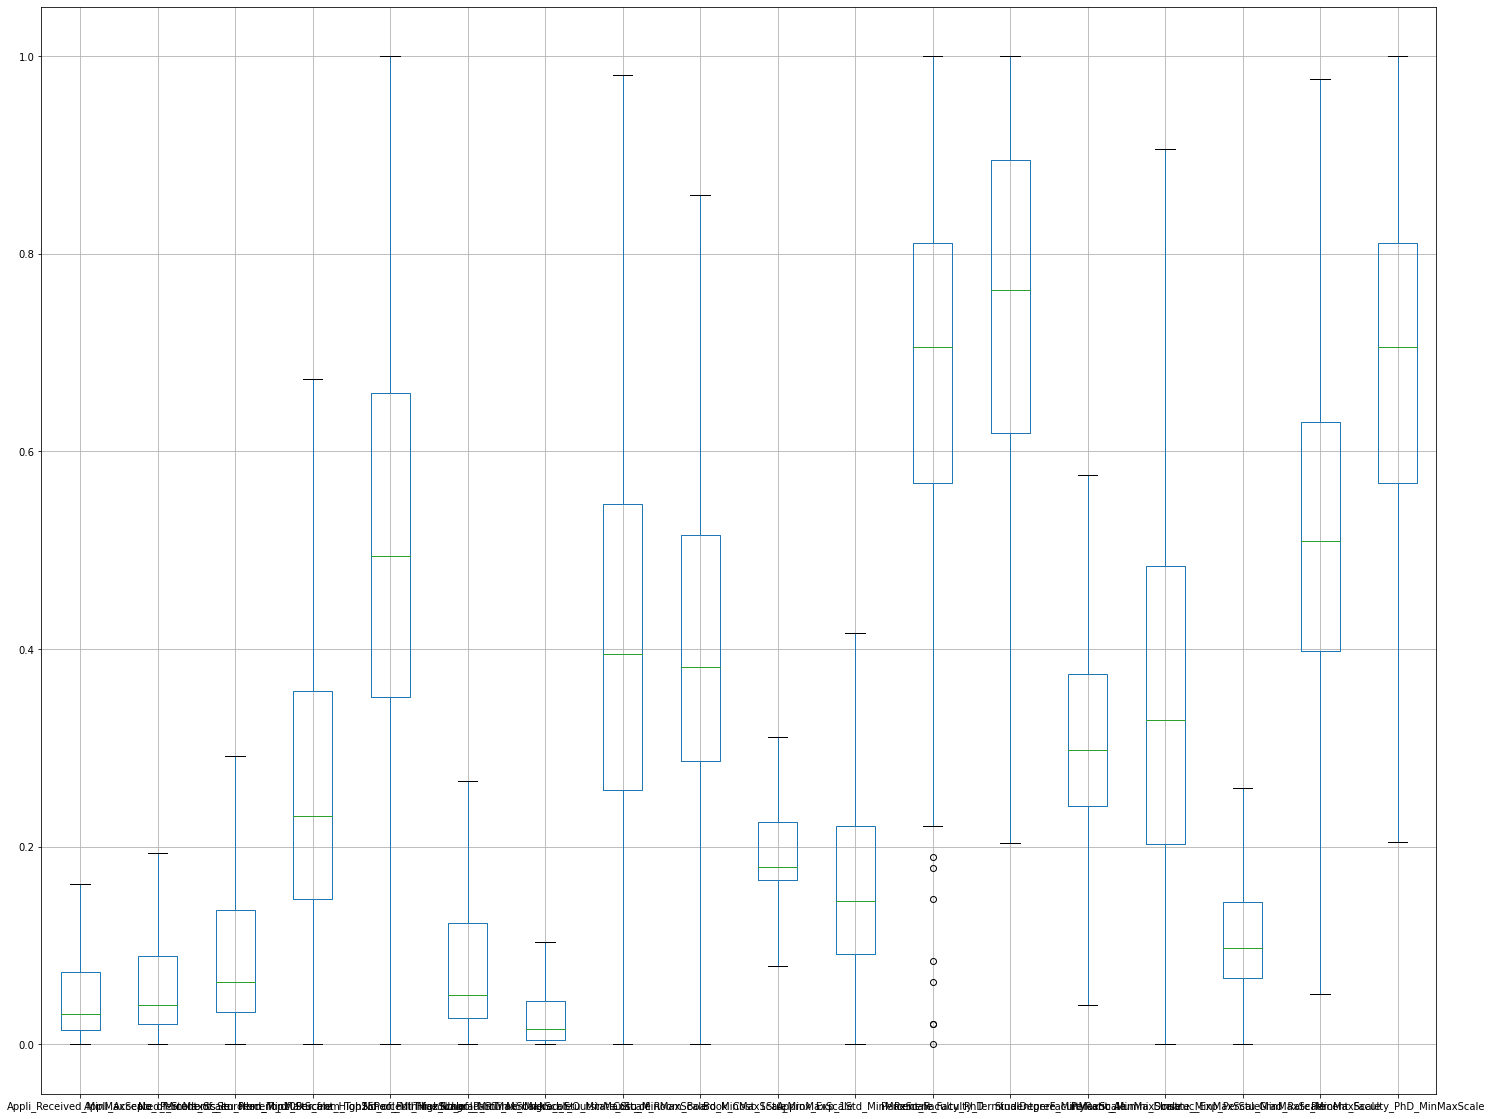

In [205]:
v1_scaled.boxplot(figsize=(25,20))

In [206]:
cov_matrix = np.cov(v1_scaled.T)
print('Covariance Matrix with scaled data after removing outliers:\n%s', cov_matrix)

Covariance Matrix with scaled data after removing outliers:
%s [[ 2.54507521e-03  2.79584501e-03  4.05793894e-03  2.65908806e-03
   4.00189492e-03  3.72297243e-03  8.60264230e-04  6.84721022e-04
   1.62601052e-03  6.11726301e-04  1.07948327e-03  3.96966498e-03
   4.17411756e-03  6.46996259e-04 -9.82817572e-04  7.84713199e-04
   1.20757167e-03  3.93024030e-03]
 [ 2.79584501e-03  3.36542544e-03  4.86608421e-03  2.12481105e-03
   3.45535306e-03  4.46030294e-03  1.08984885e-03 -6.02830996e-05
   1.19269684e-03  6.21719887e-04  1.38383095e-03  4.20746179e-03
   4.45669245e-03  1.10945909e-03 -1.84919435e-03  6.01022509e-04
   7.27278114e-04  4.16309298e-03]
 [ 4.05793894e-03  4.86608421e-03  8.04337922e-03  2.52665451e-03
   4.49773629e-03  7.43561581e-03  1.88758389e-03 -2.89994204e-03
  -3.67667131e-04  9.30538966e-04  2.83205236e-03  5.81839581e-03
   6.05249145e-03  2.49552721e-03 -3.84687046e-03  3.11354828e-04
  -3.30988643e-04  5.74620131e-03]
 [ 2.65908806e-03  2.12481105e-03  2.526

In [207]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n%s', eig_vals)
print('Eigen Vectors \n%s', eig_vecs)


 Eigen Values 
%s [1.72795476e-01 6.13386713e-02 3.21238158e-02 2.37135452e-02
 1.49237049e-02 1.15955040e-02 9.52482765e-03 6.87992753e-03
 6.15445002e-03 5.32604385e-03 2.61861966e-03 2.24273295e-03
 7.95120718e-04 5.58398685e-04 3.79314858e-04 1.91667865e-04
 9.86292796e-05 7.35627733e-05]
Eigen Vectors 
%s [[ 4.49518901e-02 -1.12611242e-01  1.73114777e-02 -1.01139599e-01
  -1.39717568e-01  1.91079512e-01 -1.11501447e-01  7.38066048e-02
   2.47392875e-02 -1.06117529e-01  1.09442456e-02  2.20729608e-02
  -1.04547008e-02 -4.37437693e-01  3.90201082e-01  3.54868087e-01
   6.46943550e-01  1.38409713e-02]
 [ 3.97098744e-02 -1.40877642e-01  8.74517048e-03 -1.07185612e-01
  -1.66271214e-01  2.28160157e-01 -1.48946583e-01  1.05246260e-01
   2.29882618e-02 -1.22588370e-01 -1.04775815e-02  5.92538752e-03
  -5.83300823e-02 -4.50235181e-01  3.53146419e-01 -2.29192228e-02
  -7.12033486e-01 -1.26635228e-03]
 [ 3.95651260e-02 -2.49133432e-01  5.91172085e-02 -1.33206790e-01
  -2.47758191e-01  3.71

In [210]:
eig_vecs[0]

array([ 0.04495189, -0.11261124,  0.01731148, -0.1011396 , -0.13971757,
        0.19107951, -0.11150145,  0.0738066 ,  0.02473929, -0.10611753,
        0.01094425,  0.02207296, -0.0104547 , -0.43743769,  0.39020108,
        0.35486809,  0.64694355,  0.01384097])

In [212]:
eig_vecs.T[0]


array([ 0.04495189,  0.03970987,  0.03956513,  0.33023587,  0.43173301,
        0.0253699 , -0.01155561,  0.38220005,  0.24641051,  0.01634057,
       -0.04533712,  0.32379216,  0.35471879, -0.1068642 ,  0.27178016,
        0.11955826,  0.23926961,  0.3193712 ])

In [214]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 49.18267784  66.64146894  75.78485234  82.53442521  86.78215085
  90.08257254  92.79361882  94.75184867  96.50358628  98.01953511
  98.76487133  99.40321913  99.62953389  99.78847059  99.89643476
  99.95098907  99.97906187 100.        ]


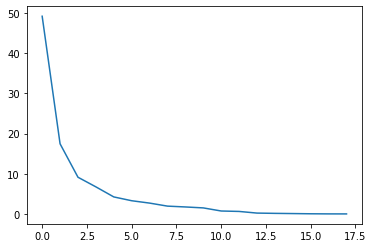

In [215]:
plt.plot(var_exp)

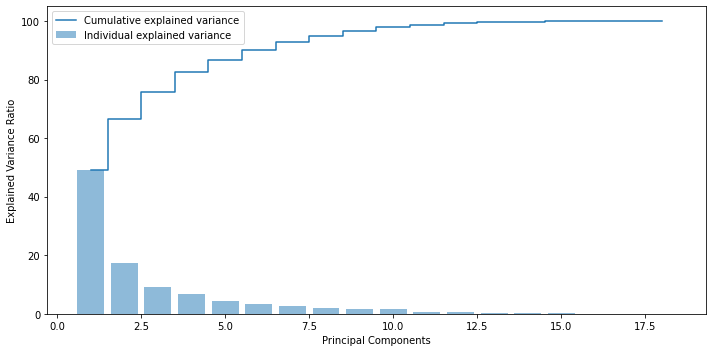

In [225]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
data_reduced = pca.fit_transform(v1_scaled)
data_reduced.transpose()

array([[-0.24033092, -0.57352671, -0.24711518, ..., -0.1338771 ,
         1.07467244, -0.03214799],
       [-0.17881673,  0.56634086,  0.27953488, ..., -0.05432502,
         0.19596405, -0.05948769],
       [ 0.08860881, -0.12604174,  0.09327346, ...,  0.15397868,
         0.07720293,  0.23232512],
       ...,
       [ 0.03425038, -0.00913396,  0.05332753, ..., -0.12813839,
         0.08982101, -0.12985065],
       [ 0.04495219,  0.02083452, -0.0614986 , ..., -0.05277523,
         0.1533457 ,  0.07629538],
       [ 0.02162284, -0.08239238,  0.01215097, ..., -0.00965446,
        -0.04446377, -0.02428578]])

In [219]:
pca.components_

array([[ 4.49518901e-02,  3.97098744e-02,  3.95651260e-02,
         3.30235869e-01,  4.31733008e-01,  2.53699041e-02,
        -1.15556082e-02,  3.82200047e-01,  2.46410511e-01,
         1.63405725e-02, -4.53371195e-02,  3.23792165e-01,
         3.54718791e-01, -1.06864202e-01,  2.71780158e-01,
         1.19558264e-01,  2.39269606e-01,  3.19371202e-01],
       [-1.12611242e-01, -1.40877642e-01, -2.49133432e-01,
         1.71961454e-02, -4.74204826e-02, -2.53066064e-01,
        -7.93530063e-02,  3.94729693e-01,  1.83874467e-01,
        -3.71406533e-02, -1.54649465e-01, -3.55749726e-01,
        -3.50348804e-01, -1.89795684e-01,  3.98664502e-01,
         4.98480321e-02,  2.25025995e-01, -3.46733746e-01],
       [ 1.73114777e-02,  8.74517048e-03,  5.91172085e-02,
         4.03002148e-01,  6.11586104e-01,  4.81641137e-02,
        -1.27701217e-02, -2.97444027e-01, -4.62859225e-01,
         1.76642516e-02,  6.40241920e-02, -1.79831758e-01,
        -2.52794427e-01,  4.16609916e-02,  1.26277118e

In [220]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var

array([49.18, 66.64, 75.78, 82.53, 86.78, 90.08, 92.79, 94.75, 96.5 ])

In [222]:
v1_comp = pd.DataFrame(pca.components_,columns=list(v1_scaled))
v1_comp.T

,0,1,2,3,4,5,6,7,8
Appli_Received_MinMaxScale,0.044952,-0.112611,0.017311,-0.101140,0.139718,0.191080,0.111501,-0.073807,-0.024739
Appli_Accepted_MinMaxScale,0.039710,-0.140878,0.008745,-0.107186,0.166271,0.228160,0.148947,-0.105246,-0.022988
No_of_Students_enrolled_MinMaxScale,0.039565,-0.249133,0.059117,-0.133207,0.247758,0.371387,0.222393,-0.138999,-0.026390
Percent_of_Stu_from_Top10Percent_HighSchool_MinMaxScale,0.330236,0.017196,0.403002,-0.166151,-0.163354,-0.051999,0.001259,0.024678,-0.066144
Percent_of_Stu_from_Top25Percent_HighSchool_MinMaxScale,0.431733,-0.047420,0.611586,-0.248647,-0.133614,-0.041907,-0.194617,-0.078263,0.044407
No_of_FullTime_Ungrad_Stu_MinMaxScale,0.025370,-0.253066,0.048164,-0.126888,0.225188,0.338908,0.177383,-0.125378,-0.020402
No_of_PartTime_Ungrad_Stu_MinMaxScale,-0.011556,-0.079353,-0.012770,-0.047918,0.050827,0.096740,0.012248,-0.023829,-0.005551
No_of_Outstate_Stu_MinMaxScale,0.382200,0.394730,-0.297444,-0.159641,-0.173327,-0.009657,0.590366,-0.298834,-0.063053
Cost_of_Room_Board_MinMaxScale,0.246411,0.183874,-0.462859,-0.495631,0.042042,0.280879,-0.577005,0.117937,-0.100388
Book_Cost_1Stu_MinMaxScale,0.016341,-0.037141,0.017664,-0.056101,-0.014779,0.092897,-0.012380,0.129182,0.067466
